This notebook is aimed at preparing and exploring health care data, drawing insights from the data, creating a predictive model and testing the model on a new data set. The dataset to be used contains admission data of patients icluding the length od stay. We would be predicting the length of stay using other parameters of the data set.

First, I import the required modules.

In [ ]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
import pandas as pd
%matplotlib inline
import seaborn as sns 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

Then I read the data into a dataframe

In [14]:
df_train = pd.read_csv('/train.csv')
df_test = pd.read_csv('/test.csv')


Then I move on to examining the data, check for columns, characteritics, data type and general statistics.

In [15]:
df_train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [17]:
df_train.describe()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318325.000000,318438.000000,313906.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,4.771717,3.197627,2.625807,65747.579472,7.251859,3.284099,4880.749392
std,91925.276847,8.633755,3.102535,1.168171,0.873146,37979.936440,4.745266,1.764061,1086.776254
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79610.250000,11.000000,2.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000
50%,159219.500000,19.000000,5.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000
75%,238828.750000,26.000000,7.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000
max,318438.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


In [18]:
# checking for data types
df_train.dtypes

case_id                                int64
Hospital_code                          int64
Hospital_type_code                    object
City_Code_Hospital                     int64
Hospital_region_code                  object
Available Extra Rooms in Hospital      int64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed Grade                            float64
patientid                              int64
City_Code_Patient                    float64
Type of Admission                     object
Severity of Illness                   object
Visitors with Patient                  int64
Age                                   object
Admission_Deposit                    float64
Stay                                  object
dtype: object

In [19]:
#checking for null values
df_train.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [20]:
df_train.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

In [21]:
#getting the distribution of values in the bed grade column
df_train['Bed Grade'].value_counts()

2.0    123671
3.0    110583
4.0     57566
1.0     26505
Name: Bed Grade, dtype: int64

In [22]:
#filling all null values with the mode
df_train['Bed Grade'].fillna(2.0, inplace=True)

In [23]:
#filling the missing values
df_train = df_train.fillna(df_train['City_Code_Patient'].value_counts().index[0])


Now I confirm if all null values have been treated

In [24]:
df_train.isnull().sum()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
patientid                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

Visualizing the different parmeters

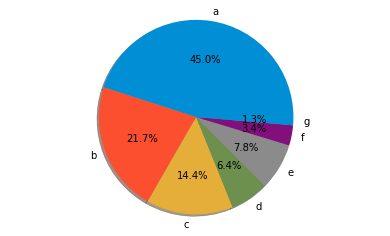

In [25]:
labels = df_train['Hospital_type_code'].astype('category').cat.categories.tolist()
counts = df_train['Hospital_type_code'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

The pie chart shows that Hospital_type_code a occurs the most at 45%, while g represents the smallest 
percentge of the hospital_type_code

More visualization of the different categorical variables are displayed.

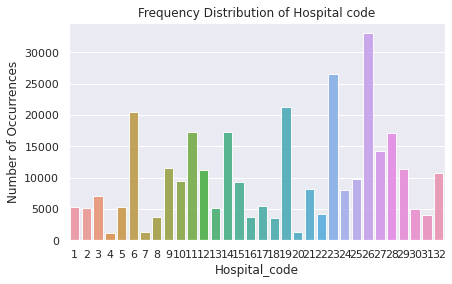

In [26]:
Hospital_code_count = df_train['Hospital_code'].value_counts()
sns.set(style="darkgrid")
sns.barplot(Hospital_code_count.index, Hospital_code_count.values, alpha=0.9)
plt.title('Frequency Distribution of Hospital code')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Hospital_code', fontsize=12)
plt.show()

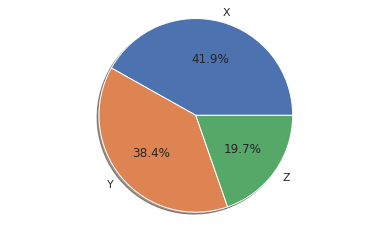

In [27]:
labels = df_train['Hospital_region_code'].astype('category').cat.categories.tolist()
counts = df_train['Hospital_region_code'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

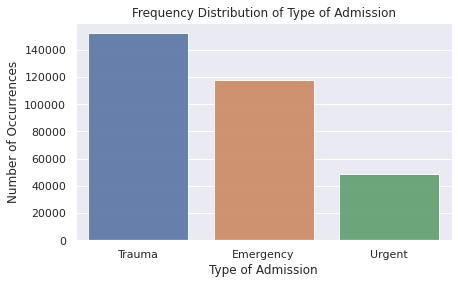

In [28]:
Type_of_Admission_count = df_train['Type of Admission'].value_counts()
sns.set(style="darkgrid")
sns.barplot(Type_of_Admission_count.index, Type_of_Admission_count.values, alpha=0.9)
plt.title('Frequency Distribution of Type of Admission')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Type of Admission', fontsize=12)
plt.show()

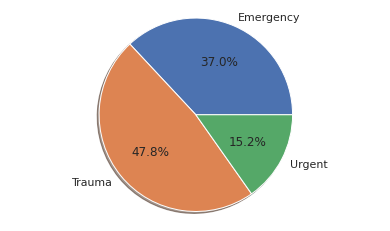

In [29]:
labels = df_train['Type of Admission'].astype('category').cat.categories.tolist()
counts = df_train['Type of Admission'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

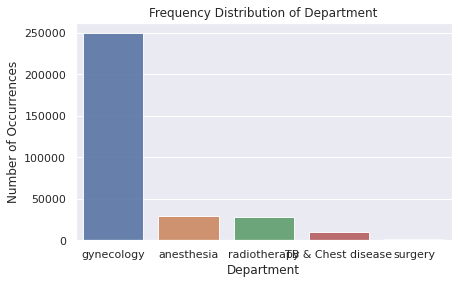

In [30]:
Department_count = df_train['Department'].value_counts()
sns.set(style="darkgrid")
sns.barplot(Department_count.index, Department_count.values, alpha=0.9)
plt.title('Frequency Distribution of Department')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.show()

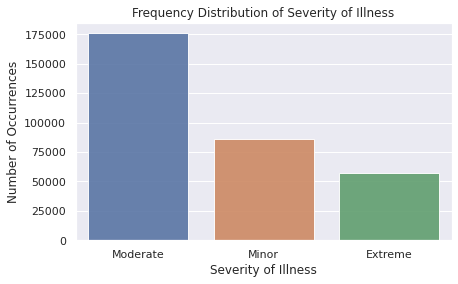

In [31]:
Severity_of_Illness_count = df_train['Severity of Illness'].value_counts()
sns.set(style="darkgrid")
sns.barplot(Severity_of_Illness_count.index, Severity_of_Illness_count.values, alpha=0.9)
plt.title('Frequency Distribution of Severity of Illness')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Severity of Illness', fontsize=12)
plt.show()

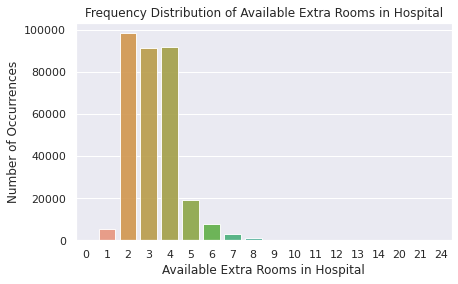

In [32]:
Available_Extra_Rooms_in_Hospital_count = df_train['Available Extra Rooms in Hospital'].value_counts()
sns.set(style="darkgrid")
sns.barplot(Available_Extra_Rooms_in_Hospital_count.index, Available_Extra_Rooms_in_Hospital_count.values, alpha=0.9)
plt.title('Frequency Distribution of Available Extra Rooms in Hospital')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Available Extra Rooms in Hospital', fontsize=12)
plt.show()

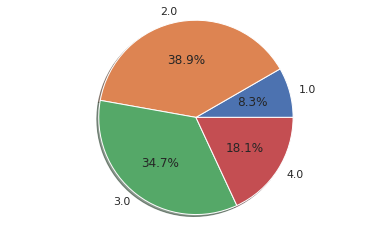

In [33]:
labels = df_train['Bed Grade'].astype('category').cat.categories.tolist()
counts = df_train['Bed Grade'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

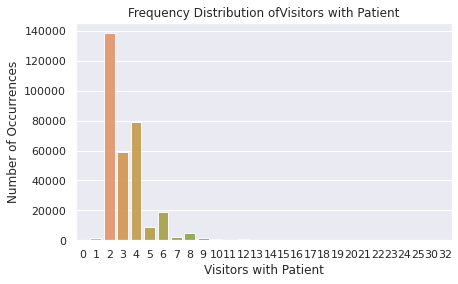

In [34]:
Visitors_with_Patient_count = df_train['Visitors with Patient'].value_counts()
sns.set(style="darkgrid")
sns.barplot(Visitors_with_Patient_count.index,Visitors_with_Patient_count.values, alpha=0.9)
plt.title('Frequency Distribution ofVisitors with Patient')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Visitors with Patient', fontsize=12)
plt.show()

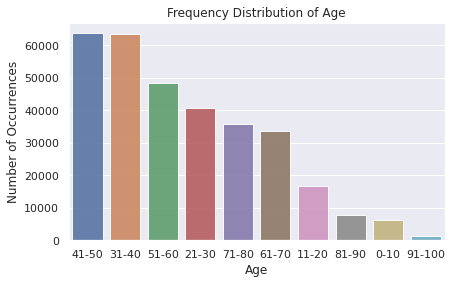

In [35]:
Age_count = df_train['Age'].value_counts()
sns.set(style="darkgrid")
sns.barplot(Age_count.index, Age_count.values, alpha=0.9)
plt.title('Frequency Distribution of Age')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Age', fontsize=12)
plt.show()

Finally, the target variable is visualied below

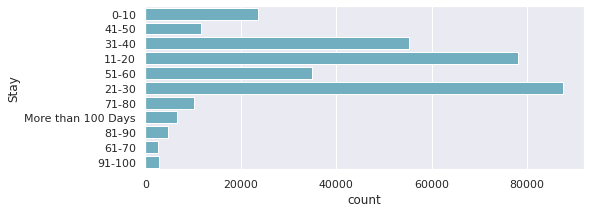

In [36]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="Stay", data=df_train, color="c")

Selecting the columns for prediction and the target variable.

In [44]:
X = df_train[['Hospital_code', 'Type of Admission', 'Department', 'Severity of Illness', 'Available Extra Rooms in Hospital', 'Bed Grade', 'Visitors with Patient', 'Age']]
y = df_train[["Stay"]]

To make it possible for model creation, the columns are tranformed

In [38]:
X = X.apply(LabelEncoder().fit_transform)

In [39]:
X.head()

,Hospital_code,Type of Admission,Department,Severity of Illness,Available Extra Rooms in Hospital,Bed Grade,Visitors with Patient,Age
0,7,0,3,0,3,1,2,5
1,1,1,3,0,2,1,2,5
2,9,1,1,0,2,1,2,5
3,25,1,3,0,2,1,2,5
4,25,1,3,0,2,1,2,5


In [40]:
y = y.apply(LabelEncoder().fit_transform)

In [41]:
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

Creating a classifier

In [42]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

Then we check the accuracy

In [43]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.3364213038562995


Now we test on the test data

In [47]:
Xt = df_test[['Hospital_code', 'Type of Admission', 'Department', 'Severity of Illness', 'Available Extra Rooms in Hospital', 'Bed Grade', 'Visitors with Patient', 'Age']]


In [49]:
Xt = Xt.apply(LabelEncoder().fit_transform)

In [50]:
yt_pred=clf.predict(Xt)